In [1]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.1.2
0.16.2


In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]") 
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


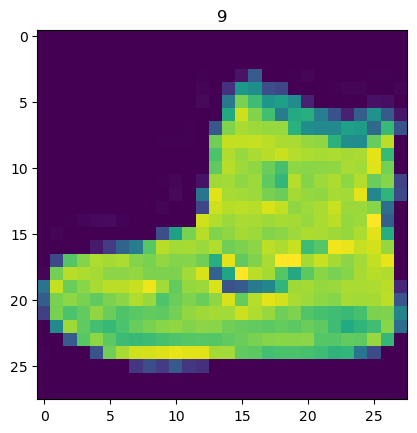

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);
# image

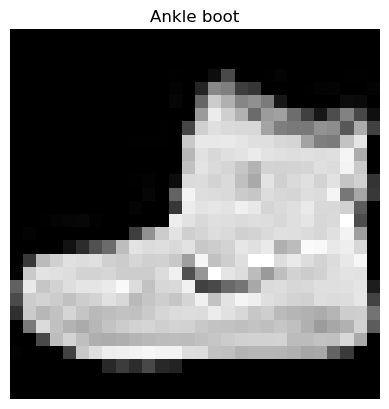

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

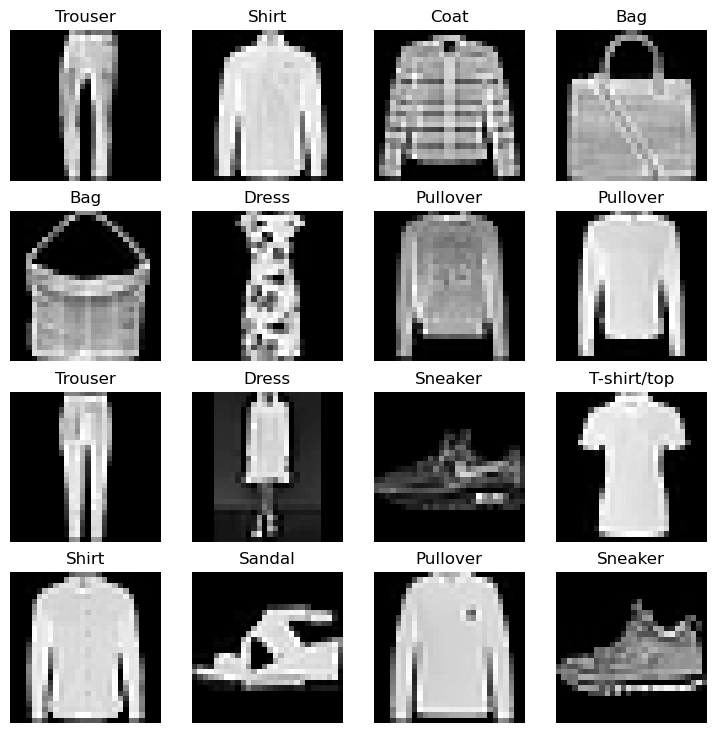

In [10]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x195ec01f710>,
 <torch.utils.data.dataloader.DataLoader at 0x195ec32b890>)

In [13]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000195EC01F710>, <torch.utils.data.dataloader.DataLoader object at 0x00000195EC32B890>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


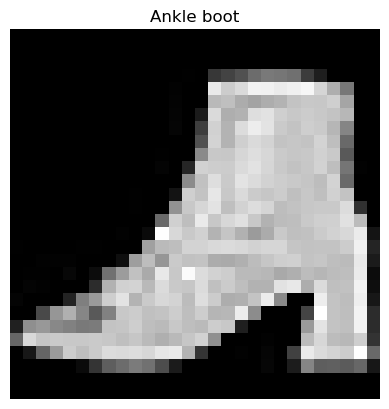

In [15]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten() 

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [17]:
from torch import nn 
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                        out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                        out_features=output_shape)
    )

    def forward(self, x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # this is 28*28
    hidden_units=10, # how mnay units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


In [20]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [21]:
from timeit import default_timer as timer 
def print_train_time(start: float,
                        end: float, 
                        device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [22]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer() 

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)
    
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()
    
    # Print out what's happening
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
  
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode(): 
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 24.823 seconds


In [120]:

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [128]:
### Make predictions and get evaluation metrics

from torch import mode


torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device= device):
    
    """Returns a a dictionary of loss and accuracy metrics."""
    
    loss, acc = 0, 0
    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1))
            
        # Scale the loss and accuracy values by the number of batches
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {'model_name': model.__class__.__name__, #Only works if model was created with a class
            'model_loss': loss.item(),
            'model_accuracy': acc}
    
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

### Set up device agonistic code if GPU is available

## --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [113]:
# Build a model 
class Fashion_MNIST_Model_V1(nn.Module):
    
    def __init__(self,
                input_shape: int,
                output_shape: int,
                hidden_neurons: int):
        """
            A CNN model for classifying Fashion MNIST images.

            Args:
            input_shape (int): The input shape of the model.
            output_shape (int): The output shape of the model.
            hidden_neurons (int): The number of hidden neurons in the model.
        """
        super().__init__()
        
        # Define the layers
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_neurons),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, output_shape),
            nn.LeakyReLU(),
        )
        
    def forward(self, x):
        return self.layer_stack(x)


Model_V1 = Fashion_MNIST_Model_V1(784,10,64).to(device)


In [114]:
next(Model_V1.parameters()).device


device(type='cuda', index=0)

In [115]:
import torch
Model_V1_loss_fn = nn.CrossEntropyLoss()
Model_V1_optimizer = torch.optim.SGD(Model_V1.parameters(), lr=0.1)

### Functionizing training and evaluation loops

Create a function for:
* training loop: `train_step`
* testing loop: `test_step`

In [116]:
from torch import mode


def train_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device):
    
    """
    Performs a single training step (forward pass, backward pass, optimizer step) and returns the loss and accuracy metrics.
    """
    # Initialize loss and accuracy values
    train_loss, train_acc = 0, 0
    
    model.to(device)
    
    # Put model into training mode
    model.train()
    
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        
        # Move data and model to device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass (outputs the raw logits)
        y_pred = model(X)
        
        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred.argmax(dim=1)) #logits --> labels
        
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()
        
    
    # Divide total train loss and accuracy by length of data_loader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [117]:
def test_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device):
    """
    Performs a single test step (forward pass, calculate loss and accuracy) and returns the loss and accuracy metrics.
    """
    # Initialize loss and accuracy values
    test_loss, test_acc = 0, 0
    
    model.to(device)
    
    # Put the in evaluation mode and inference mode
    model.eval()
    with torch.inference_mode(): 
        for X, y in data_loader:
            
            # Move data and model to device
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y)
            
            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))
        
        # Divide total train loss and accuracy by length of data_loader
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [320]:
# Use the train_step function to train the model for 3 epochs.

# Set the seed and start the timer
import torch
torch.manual_seed(42)
from timeit import default_timer as timer


train_time_start_on_gpu = timer()
EPOCHS = 3

# Train the model for 3 epochs
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch {epoch} of {EPOCHS}")
    
    # Train step
    train_step(model=Model_V1,
                data_loader=train_dataloader,
                loss_fn=Model_V1_loss_fn,
                optimizer=Model_V1_optimizer,
                accuracy_fn=accuracy_fn,
                device=torch.device(device))
    
    # Test step
    test_step(model=Model_V1,
                data_loader=test_dataloader,
                loss_fn=Model_V1_loss_fn,
                accuracy_fn=accuracy_fn,
                device=torch.device(device))

train_time_end_on_gpu = timer()

# Print the time it took to train the model
total_train_time_model_1 = train_time_end_on_gpu - train_time_start_on_gpu
print(f"Total training time: {total_train_time_model_1:.2f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0 of 3
Train loss: 0.35087 | Train acc: 87.21%
Test loss: 0.38100 | Test acc: 86.27%
Epoch 1 of 3
Train loss: 0.33295 | Train acc: 87.75%
Test loss: 0.36681 | Test acc: 86.57%
Epoch 2 of 3
Train loss: 0.31841 | Train acc: 88.25%
Test loss: 0.35702 | Test acc: 87.26%


In [131]:
Model_V1_results = eval_model(model=Model_V1,
                            data_loader=test_dataloader,
                            loss_fn=Model_V1_loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

Model_V1_results

{'model_name': 'Fashion_MNIST_Model_V1',
 'model_loss': 0.39836469292640686,
 'model_accuracy': 85.60303514376997}

In [133]:
from ast import mod


model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

### Model 2: Convolutional Neural Network (CNN)



In [300]:
class FashionMNIST_Model_V2(nn.Module):
    def __init__(
        self,
        input_shape: int,
        hidden_neurons: int,
        output_shape: int,):
        super().__init__()
        
        self.conv1_block = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_neurons,
                kernel_size=3,
                stride=1,
                padding=1),
            
            nn.ReLU(),
            
            nn.Conv2d(
                in_channels=hidden_neurons,
                out_channels=hidden_neurons,
                kernel_size=3,
                stride=1,
                padding=1),
            
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2)
            )
        
        self.conv2_block = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_neurons,
                out_channels=hidden_neurons,
                kernel_size=3,
                stride=1,
                padding=1),
            
            nn.ReLU(),
            
            nn.Conv2d(
                in_channels=hidden_neurons,
                out_channels=hidden_neurons,
                kernel_size=3,
                stride=1,
                padding=1),
            
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2)
            )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_neurons*7*7,
                        output_shape)
        )
    def forward(self, x):
        x = self.conv1_block(x)
        #print(f"Conv1 shape: {x.shape}")
        x = self.conv2_block(x)
        #print(f"Conv2 shape: {x.shape}")
        x = self.classifier(x)
        #print(f"Classifier shape: {x.shape}")
        return x

In [301]:
torch.manual_seed(42)
Model_V2 = FashionMNIST_Model_V2(
    input_shape=1,
    hidden_neurons=10,
    output_shape=len(class_names)).to(device)


In [302]:
rand_image_tensor = torch.rand(size=(1,28,28))
Model_V2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Set up a loss function and optimizer for the model


In [303]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model_V2.parameters(),
                            lr=0.1)

In [318]:
# Create a training loop 
torch.manual_seed(42)
train_time_start_on_gpu = timer()

EPOCHS = 3

for epoch in tqdm(range(EPOCHS)):
    print(f"------------------\nEpoch {epoch+1} of {EPOCHS}\n------------------")
    
    # Train step
    train_step(model=Model_V2,
                data_loader=train_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn,
                device=device)
    
    # Test step
    test_step(model=Model_V2,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)
    
train_time_end_on_gpu = timer()
total_train_time_model_2 = train_time_end_on_gpu - train_time_start_on_gpu


  0%|          | 0/3 [00:00<?, ?it/s]

------------------
Epoch 1 of 3
------------------
Train loss: 0.22131 | Train acc: 91.84%
Test loss: 0.27532 | Test acc: 90.34%
------------------
Epoch 2 of 3
------------------
Train loss: 0.22319 | Train acc: 91.80%
Test loss: 0.28782 | Test acc: 89.95%
------------------
Epoch 3 of 3
------------------
Train loss: 0.21795 | Train acc: 92.01%
Test loss: 0.28149 | Test acc: 90.27%


In [322]:
model_2_results = eval_model(model=Model_V2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

Model_V1_results = eval_model(model=Model_V1,
                            data_loader=test_dataloader,
                            loss_fn=Model_V1_loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_2_results

{'model_name': 'FashionMNIST_Model_V2',
 'model_loss': 0.28149279952049255,
 'model_accuracy': 90.2655750798722}

### Compare the model results and training times


In [325]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                Model_V1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.476639,83.426518
1,Fashion_MNIST_Model_V1,0.357018,87.260383
2,FashionMNIST_Model_V2,0.281493,90.265575


In [326]:
# Add training times to compare_results
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTModelV0,0.476639,83.426518,24.822768
1,Fashion_MNIST_Model_V1,0.357018,87.260383,30.362346
2,FashionMNIST_Model_V2,0.281493,90.265575,38.858892


#### Make and evaluate random predictions with the best performing model

In [345]:
def make_predictions(
                    model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            
            # Prepare the sample (add a batch dimension and move to device)
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            # Forward pass and get prediction probabilities
            pred_logit = model(sample)
            
            # Convert logits to probabilities
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            # Return the prediction probability
            pred_probs.append(pred_prob.cpu())
    
    # Stack the prediction probabilities into a tensor
    return torch.stack(pred_probs)

In [372]:
import random
#random.seed(84)

# Initalize lists to store samples and labels
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
#View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

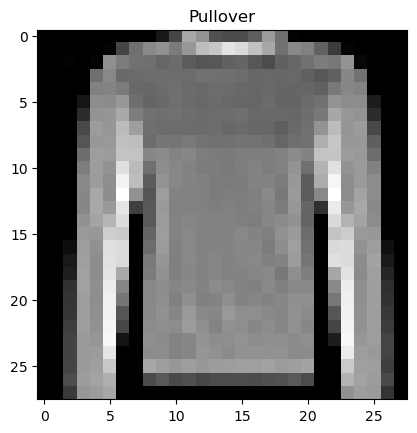

In [373]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [374]:
# Make predictions on the samples
pred_probs = make_predictions(model=Model_V2, data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]


tensor([[2.9521e-04, 4.0024e-07, 9.9507e-01, 1.2692e-06, 2.2964e-04, 1.4490e-08,
         4.4065e-03, 4.1899e-09, 1.0491e-07, 1.6916e-07],
        [7.9172e-04, 4.1255e-01, 8.8156e-06, 5.8291e-01, 1.7513e-05, 4.4376e-06,
         1.5513e-04, 3.0095e-05, 3.5266e-03, 9.3857e-06]])

In [375]:
# Convert prediction probabilities to predicted labels
pred_labels = pred_probs.argmax(dim=1)
pred_labels

tensor([2, 3, 7, 9, 2, 7, 1, 7, 9])

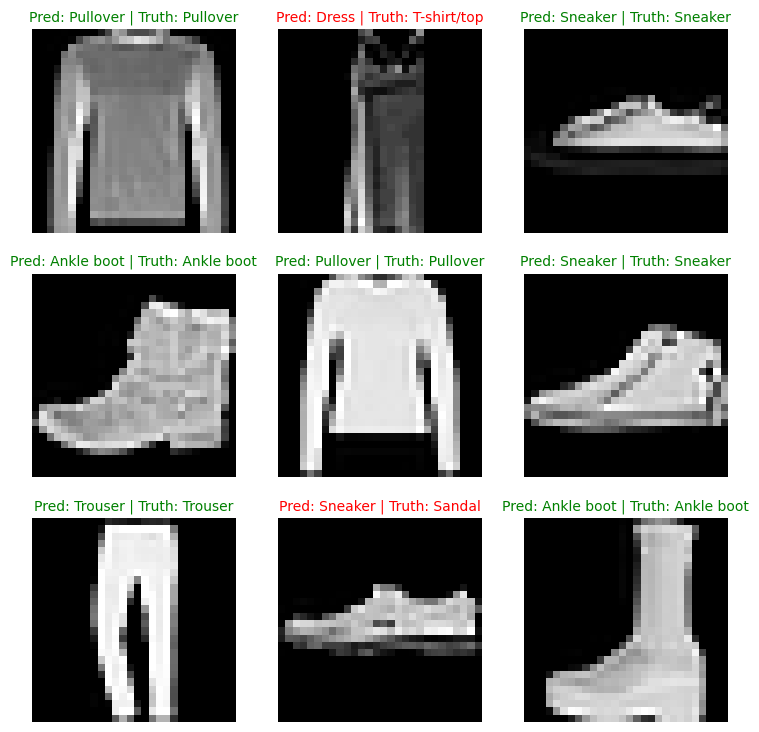

In [376]:
# Create a matplot lib graph that plots the 9 test_samples, their labels and their pred_labels in a 3x3 grid

# Setup the figure
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction label (in text form, e.g. "Sandal")
    pred_label = class_names[pred_labels[i]]

    # Get the truth label (in text form, e.g. "T-shirt")
    truth_label = class_names[test_labels[i]] 

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False);

### Making a confusion matrix for further prediction analysis


In [395]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
Model_V2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = Model_V2(X)
        # Turn predictions from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
len(y_pred_tensor)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

10000

In [396]:
# Make predictions on the entire test dataset
import torch
from tqdm import tqdm
y_preds = []
Model_V2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Predicting'):
        
        #Send the data to the device
        X, y = X.to(device), y.to(device) 
        
        #Forward pass
        y_logits = Model_V2(X)
        
        # Get the prediction probabilities
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        
        # Put the predictions on cpu for evaluation
        y_preds.append(y_pred.cpu())
        
# Concatenate the predictions into a single tensor
y_pred_tensor = torch.cat(y_preds)
len(y_pred_tensor)

Predicting: 100%|██████████| 313/313 [00:01<00:00, 205.71it/s]


10000

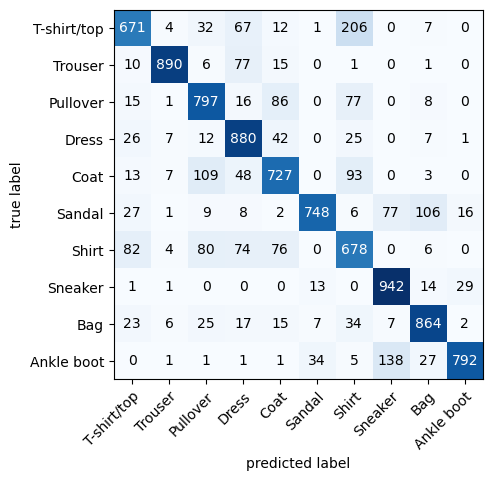

In [397]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Set up confusion instance and compare results to truth labels
conf_mat = ConfusionMatrix(num_classes=len(class_names),
                            task="multiclass")
conf_mat_tensor = conf_mat(preds=y_pred_tensor[:10000], target=test_data.targets.view(-1))

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tensor.numpy(),
    class_names=class_names,
    )

In [391]:
conf_mat_tensor

tensor([[ 54,  92,  69, 265, 133,  90,  29,  35,  66, 167],
        [ 61,  77,  67, 274, 132, 100,  36,  34,  54, 165],
        [ 64, 100,  49, 283, 124, 101,  36,  29,  55, 159],
        [ 51,  98,  64, 301, 125,  93,  27,  24,  68, 149],
        [ 59, 110,  62, 289, 116,  85,  37,  31,  55, 156],
        [ 59,  99,  64, 290, 142,  85,  25,  31,  60, 145],
        [ 72,  88,  55, 291, 120,  91,  25,  38,  61, 159],
        [ 66,  92,  71, 253, 125,  93,  37,  32,  66, 165],
        [ 70,  90,  60, 277, 117,  94,  29,  32,  77, 154],
        [ 68,  91,  64, 290, 117, 105,  32,  27,  63, 143]])

In [398]:
# Save and load Model_V2

# Save the model
import torch
from pathlib import Path

MODEL_PATH = Path("C:\\Users\\jakev\Code\\Learn_Pytorch\\models")
MODEL_PATH.mkdir(exist_ok=True,
                    parents=True)

#Create model save
MODEL_NAME = "Model_V2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Save the model
print(f"Saving model to {MODEL_SAVE_PATH}")

torch.save(obj=Model_V2.state_dict(), 
            f =MODEL_SAVE_PATH)

Saving model to C:\Users\jakev\Code\Learn_Pytorch\models\Model_V2.pth


In [399]:
# Create a new instance of the model
torch.manual_seed(42)

Model_V2_loaded = FashionMNIST_Model_V2(
    input_shape=1,
    hidden_neurons=10,
    output_shape=len(class_names)).to(device)

# Load the model parameters from the file
Model_V2_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Send the model to the device
Model_V2_loaded.to(device)

FashionMNIST_Model_V2(
  (conv1_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_block): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [402]:
# Evaluate the loaded model
Model_V2_loaded_results = eval_model(model=Model_V2_loaded,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)


model_2_results

{'model_name': 'FashionMNIST_Model_V2',
 'model_loss': 0.28149279952049255,
 'model_accuracy': 90.2655750798722}

In [404]:
print(f'''
    {Model_V2_loaded_results}
    ---------------------------
    {model_2_results}
    ''')


    {'model_name': 'FashionMNIST_Model_V2', 'model_loss': 0.28149279952049255, 'model_accuracy': 90.2655750798722}
    ---------------------------
    {'model_name': 'FashionMNIST_Model_V2', 'model_loss': 0.28149279952049255, 'model_accuracy': 90.2655750798722}
    
